In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Read data
data_dir = 'C:/Users/moo90/Box/data/misc/hyd264_data/rain-iowa.csv'

data = pd.read_csv(data_dir, names=['rainfall'])

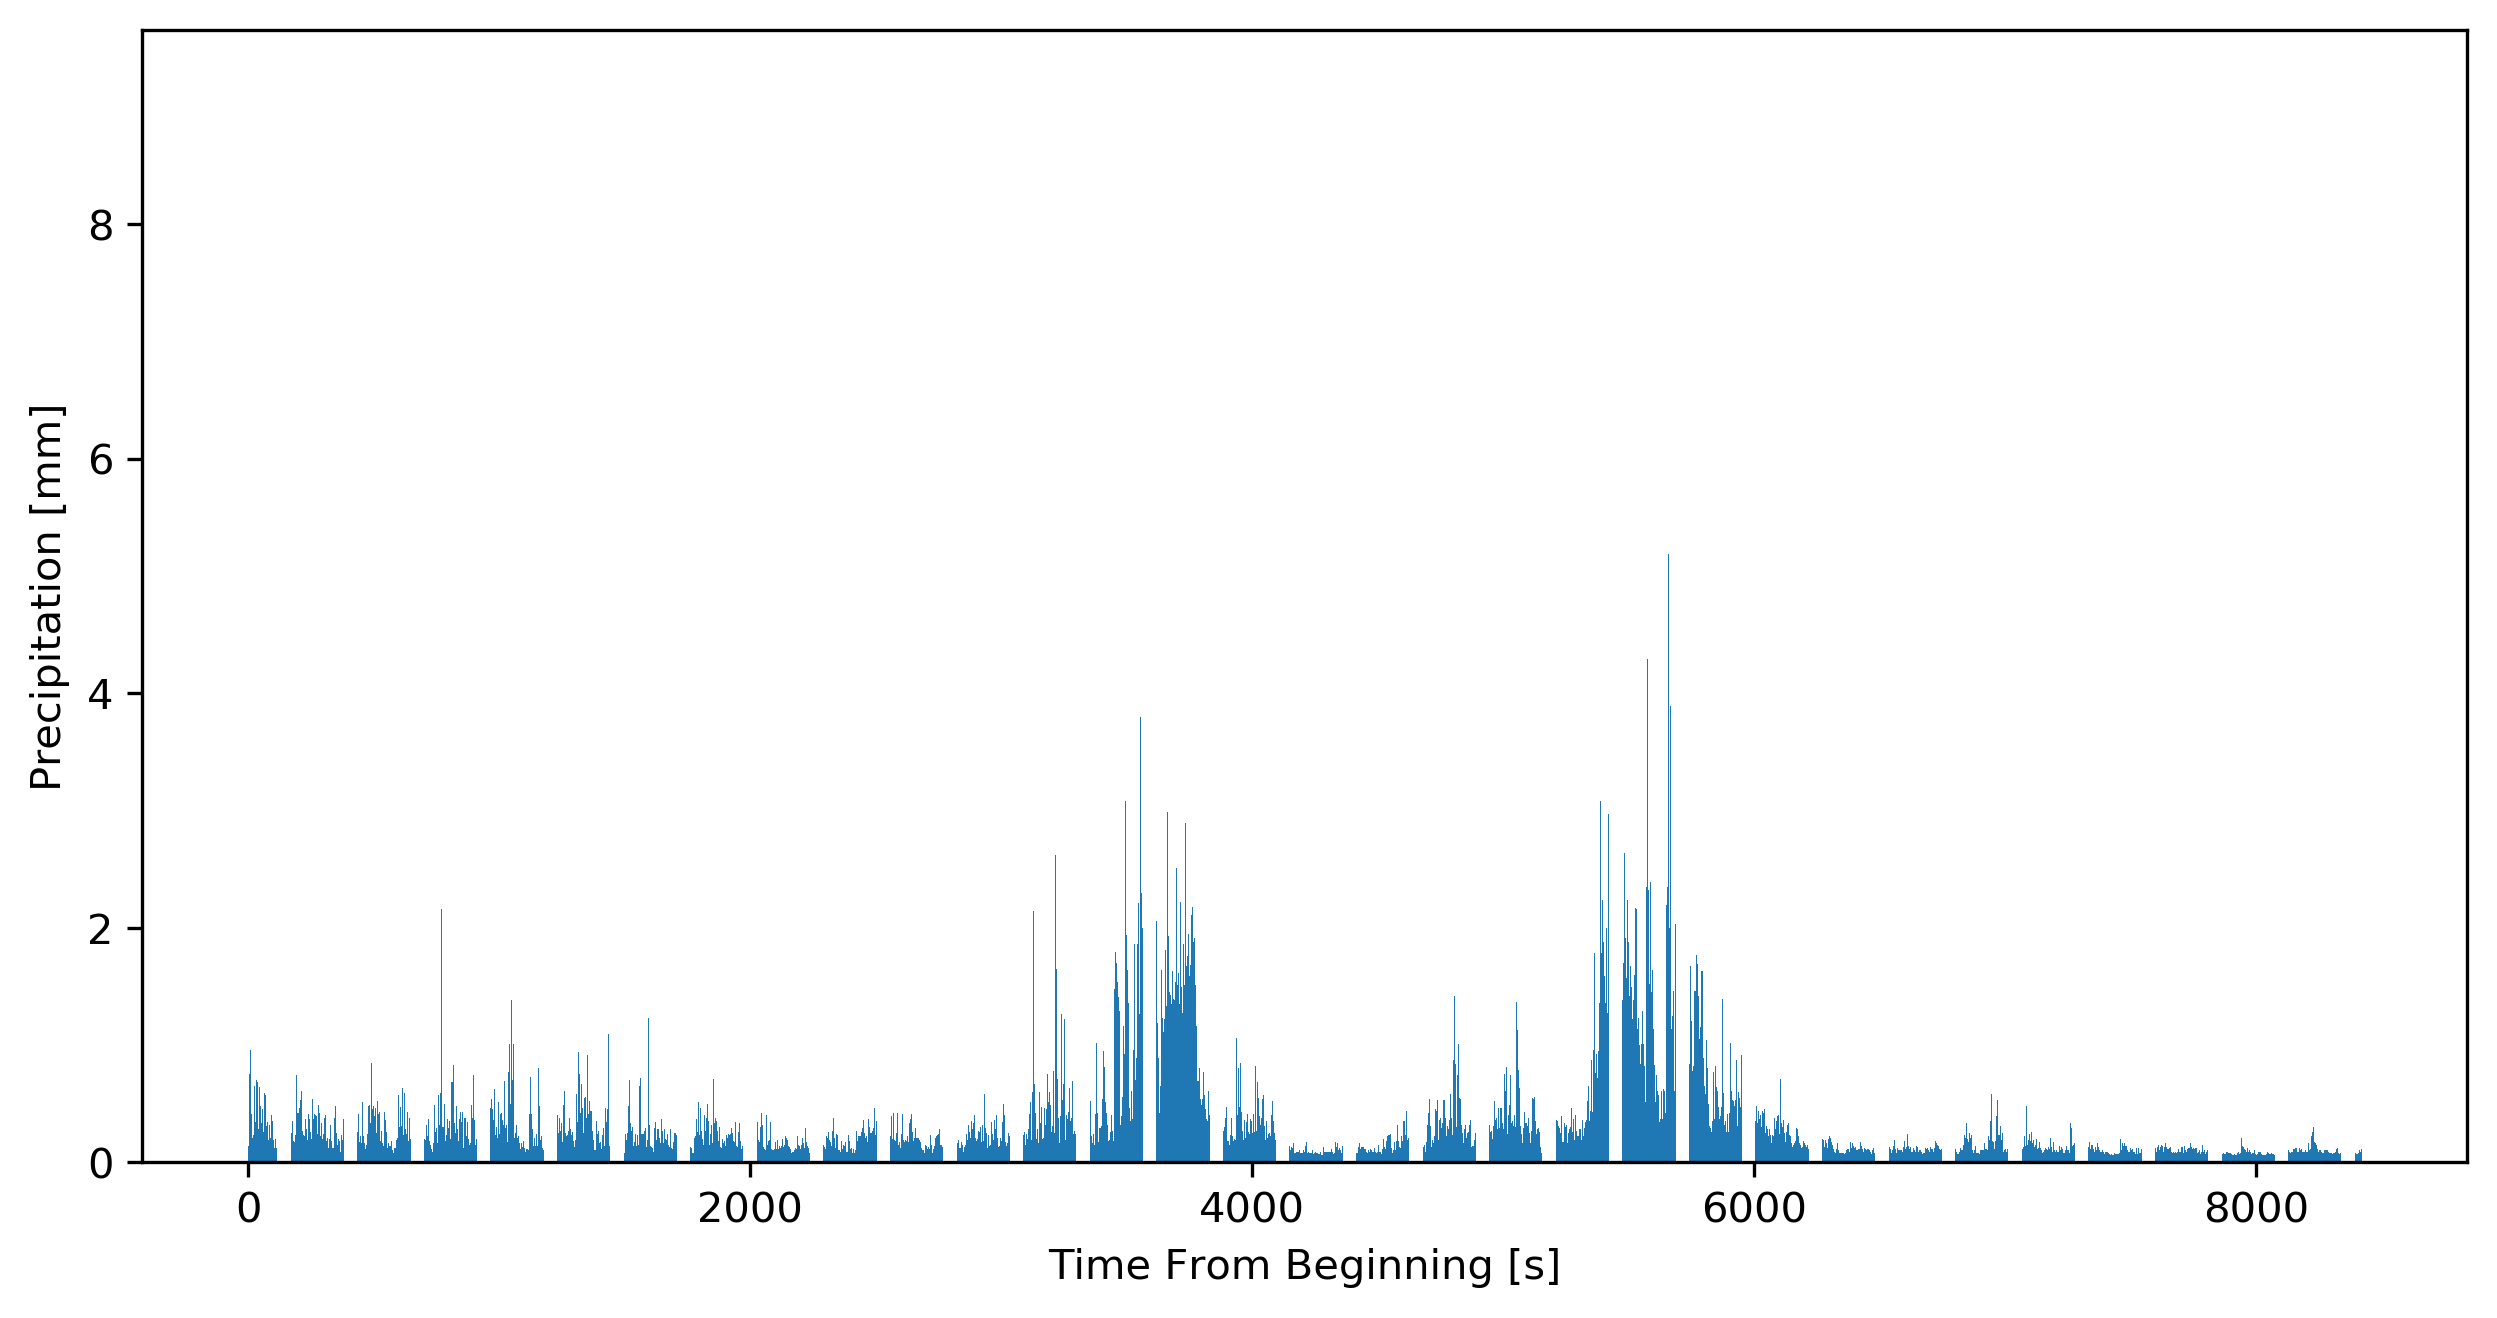

In [9]:
# part a

mean = data['rainfall'].mean()
std = data['rainfall'].std()
skew = stats.skew(data['rainfall'].values)
kurt = stats.kurtosis(data['rainfall'].values)
n = data.shape[0]

time = data.index.values * 5. # In seconds

fig, ax = plt.subplots(**{'figsize':(10,5), 'dpi':300})
ax.bar(data.index.values, data['rainfall'].values)
ax.set_xlabel('Time From Beginning [s]')
ax.set_ylabel('Precipitation [mm]')
plt.show()

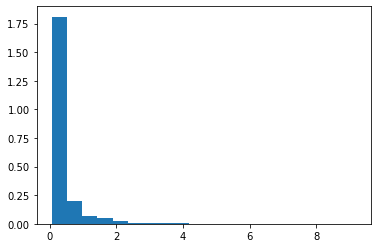

In [17]:
fig, ax = plt.subplots()

hist = ax.hist(data['rainfall'].values, density=True, bins=20)
x = np.arange(min(data['rainfall'].values),max(data['rainfall'].values), 20) # points to plot at
pdf = stats.norm.pdf(x, loc=mean, scale=std)
ax.plot(x, pdf, color='k', linewidth=2)

exp_param = stats.expon.fit(data['rainfall'].values)
gamma_param = stats.gamma.fit(data['rainfall'].values)

plt.show()
#ax.hist()

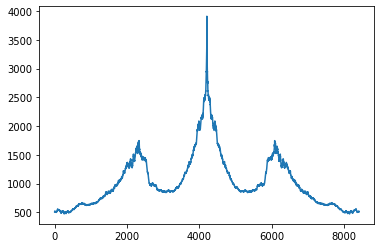

In [22]:
fig, ax = plt.subplots()

autocorr = np.correlate(data['rainfall'].values, data['rainfall'].values, mode='same')[-n:]

ax.plot(autocorr)
plt.show()

AttributeError: 'Line2D' object has no property 'xscale'

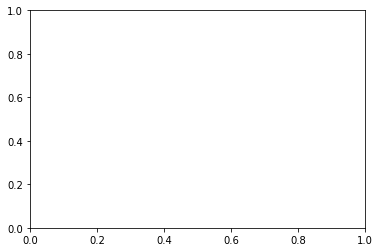

In [5]:
fig, ax = plt.subplots()

dt = 5.

ax.psd(data['rainfall'].values, 2**14, Fs=1/dt, xscale='log', detrend='linear')
plt.show()


In [ ]:
# Stuff from ECI 279
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

# Folsom annual inflow data
# summary statistics, histogram, QQ plot
annQ = np.loadtxt('data/folsom-annual.csv', delimiter=',', skiprows=1, usecols=[1])
N = len(annQ)

m = np.mean(annQ)
s = np.std(annQ)
g = stats.skew(annQ)

print('Mean = %f' % m)
print('Std. Dev. = %f' % s)
print('Skew Coef. = %f' % g) # no skew function in numpy

# other keyword arguments: bins, normed (for PDF instead of count)
plt.figure()
plt.hist(annQ, density=True, color='gray', edgecolor='none')

# plot the fitted pdf on top of the histogram
x = np.arange(min(annQ),max(annQ), 10) # points to plot at
pdf = stats.norm.pdf(x, loc=m, scale=s)
plt.plot(x, pdf, color='k', linewidth=2)
plt.xlabel('Inflow (TAF/yr)')
plt.ylabel('PDF')
plt.show()

# next figure - QQ plot and find PPCC
plt.figure()
quantiles = np.arange(1,N+1)/float(N+1)
Zp = stats.norm.ppf(quantiles)
Qpred = m + s*Zp
plt.scatter(Qpred, np.sort(annQ), color='red')
plt.plot([-1000,7000],[-1000,7000], color='k', linewidth=2)
plt.xlabel('Theoretical Quantiles (TAF/yr)')
plt.ylabel('Observed Quantiles (TAF/yr)')
plt.show()

r,p = stats.pearsonr(Qpred, np.sort(annQ))
print('PPCC = %f' % r)
